In [ ]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset files
admissions_df = pd.read_csv('/content/drive/MyDrive/THESIS_2023/mmic_iv_dataset_trial/admissions.csv')
patients_df = pd.read_csv('/content/drive/MyDrive/THESIS_2023/mmic_iv_dataset_trial/patients.csv')
diagnoses_df = pd.read_csv('/content/drive/MyDrive/THESIS_2023/mmic_iv_dataset_trial/d_icd_diagnoses 2.csv')
procedures_df = pd.read_csv('/content/drive/MyDrive/THESIS_2023/mmic_iv_dataset_trial/procedures_icd.csv')



#EXPLORATORY DATA ANALYSIS

In [ ]:
# Perform data exploration
# Display the first few rows of each dataset
print("Admissions Dataset:")
print(admissions_df.head())

print("\nPatients Dataset:")
print(patients_df.head())

print("\nDiagnoses Dataset:")
print(diagnoses_df.head())

print("\nProcedures Dataset:")
print(procedures_df.head())

# Check the shape of each dataset
print("\nDataset Shapes:")
print("Admissions Dataset Shape:", admissions_df.shape)
print("Patients Dataset Shape:", patients_df.shape)
print("Diagnoses Dataset Shape:", diagnoses_df.shape)
print("Procedures Dataset Shape:", procedures_df.shape)

# Get basic statistical summary of each dataset
print("\nStatistical Summary:")
print("Admissions Dataset Summary:")
print(admissions_df.describe())


print("\nPatients Dataset Summary:")
print(patients_df.describe())

print("\nDiagnoses Dataset Summary:")
print(diagnoses_df.describe())

print("\nProcedures Dataset Summary:")
print(procedures_df.describe())




Admissions Dataset:
   subject_id   hadm_id            admittime            dischtime  \
0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4    10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   

             deathtime admission_type admit_provider_id  \
0                  NaN         URGENT            P03YMR   
1                  NaN         URGENT            P41R5N   
2                  NaN         URGENT            P233F6   
3  2111-11-15 17:20:00         URGENT            P38TI6   
4                  NaN         URGENT            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1  TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicaid 

In [ ]:
# Explore specific columns or variables of interest
print("\nUnique Values in Admissions Dataset:")
print(admissions_df['admission_type'].unique())

print("\nUnique Values in Patients Dataset:")
print(patients_df['gender'].unique())

print("\nUnique Values in Diagnoses Dataset:")
print(diagnoses_df['icd_code'].unique())


Unique Values in Admissions Dataset:
['URGENT' 'ELECTIVE' 'EW EMER.' 'DIRECT EMER.' 'EU OBSERVATION'
 'OBSERVATION ADMIT' 'DIRECT OBSERVATION' 'AMBULATORY OBSERVATION'
 'SURGICAL SAME DAY ADMISSION']

Unique Values in Patients Dataset:
['F' 'M']

Unique Values in Diagnoses Dataset:
['0090' '01160' '01186' ... 'Z90410' 'Z948' 'Z96']


# DATA VISUALIZATIONS

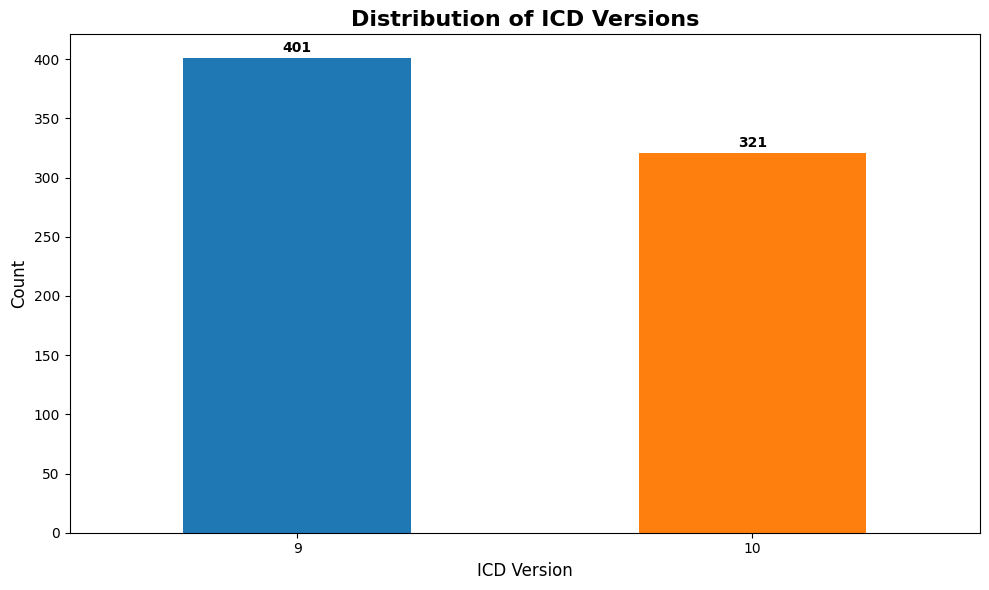

In [ ]:
# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot the distribution of icd_version
plt.figure(figsize=(10, 6))
icd_version_counts = procedures_df['icd_version'].value_counts()
icd_version_counts.plot(kind='bar', color=colors)
plt.title('Distribution of ICD Versions', fontsize=16, fontweight='bold')
plt.xlabel('ICD Version', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate each bar with its count
for i, count in enumerate(icd_version_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.tight_layout()

plt.show()





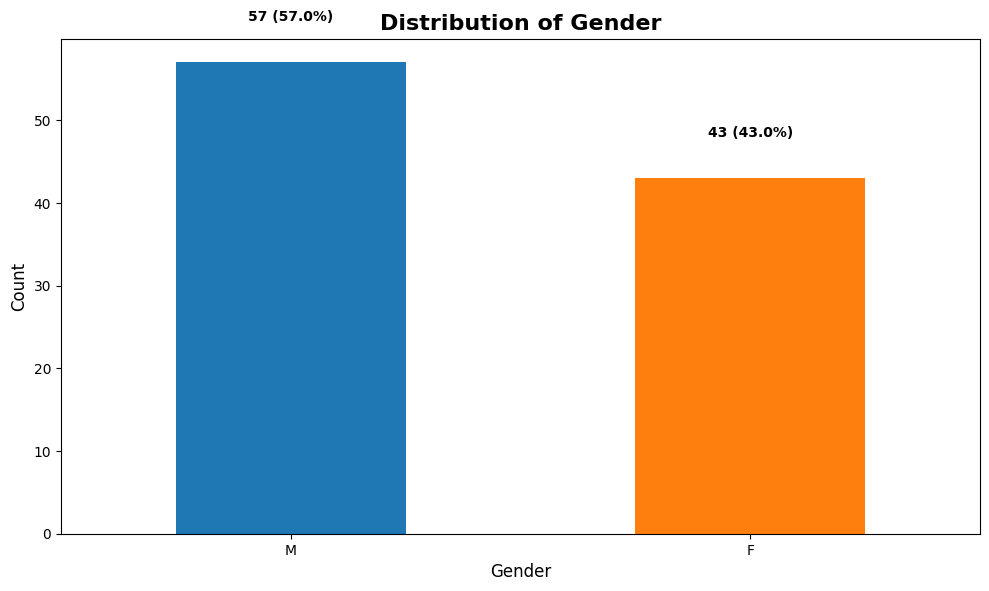

In [ ]:
# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Plot the distribution of gender
plt.figure(figsize=(10, 6))
gender_counts = patients_df['gender'].value_counts()
gender_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate each bar with its count and percentage
total_patients = len(patients_df)
for i, (gender, count) in enumerate(gender_counts.items()):
    percentage = (count / total_patients) * 100
    plt.text(i, count + 5, f"{count} ({percentage:.1f}%)", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.tight_layout()

plt.show()

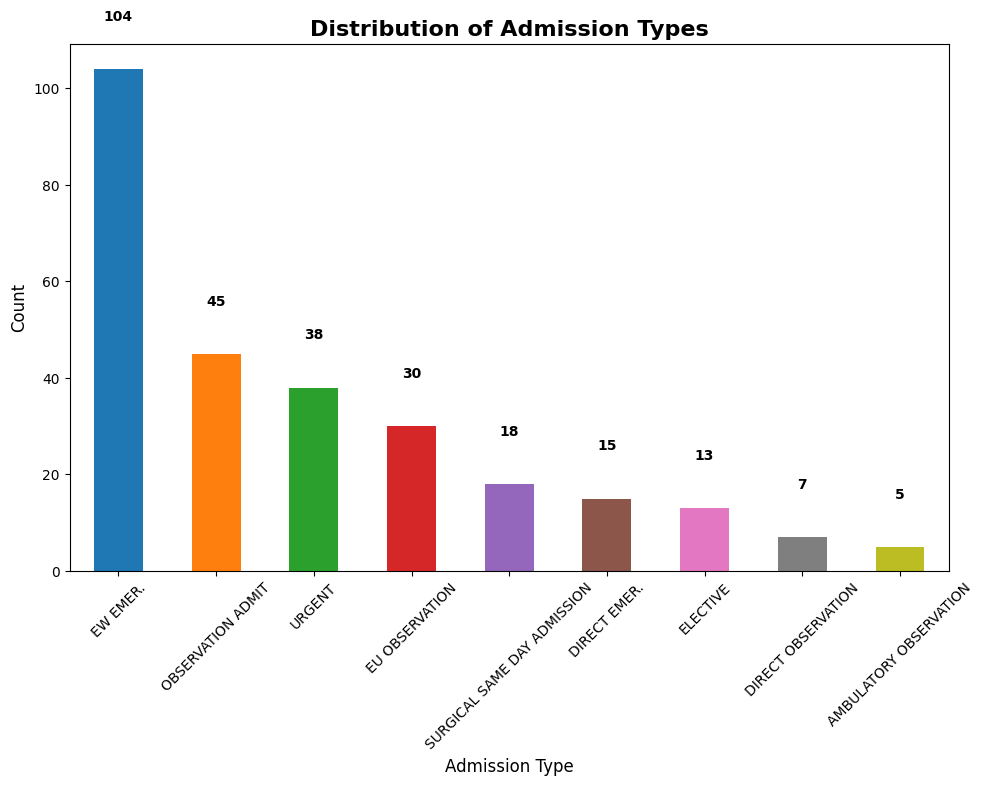

In [ ]:
# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the distribution of admission_type
plt.figure(figsize=(10, 8))

admissions_df['admission_type'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Admission Types', fontsize=16, fontweight='bold')
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate each bar with its count
for i, (admission_type, count) in enumerate(admissions_df['admission_type'].value_counts().items()):
    plt.text(i, count + 10, f"{count}", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# MERGE DATASETS

In [ ]:
# Merge patients and admissions based on subject_id and hadm_id
merged_data = pd.merge(patients_df, admissions_df, left_on='subject_id', right_on='subject_id', how='inner')

# Merge with procedures based on hadm_id
merged_data = pd.merge(merged_data, procedures_df, left_on='hadm_id', right_on='hadm_id', how='left')

merged_data = pd.merge(merged_data, diagnoses_df, left_on='icd_code', right_on='icd_code', how='inner', suffixes=('_diagnosis', '_procedure'))

merged_data = merged_data.drop_duplicates()

# Define the list of terms to search for
target_terms = ['heart', 'cardiac arrest', 'hypertension', 'hypotension', 'cardiovascular', 'myocardial', 'heart failure', 'Arrhythmia',
                'Hypertensive','congestive','Coronary','Cardiomyopathy','cholesterol','bypass','Pacemaker','angina','aortic','Mitral valve'
                ,'endocardium','Tricuspid','valve','rheumatic','pneumohemothorax']

# Create a new column 'Heart_Disease'
merged_data['Heart_Disease'] = (merged_data['long_title'].str.contains('|'.join(target_terms), case=False, na=False)).astype(int)


# Select relevant columns for analysis
selected_columns = ['subject_id_x', 'hadm_id', 'gender', 'anchor_age', 'anchor_year', 'anchor_year_group',
                    'dod', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admit_provider_id',
                    'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status',
                    'race', 'edregtime', 'edouttime', 'hospital_expire_flag', 'seq_num', 'chartdate',
                    'icd_code', 'icd_version_procedure', 'long_title', 'Heart_Disease']

final_dataset = merged_data[selected_columns]


final_dataset

,subject_id_x,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,deathtime,...,race,edregtime,edouttime,hospital_expire_flag,seq_num,chartdate,icd_code,icd_version_procedure,long_title,Heart_Disease
0,10014729,23300884,F,21,2125,2011 - 2013,NaN,2125-03-19 16:58:00,2125-03-28 13:37:00,NaN,...,WHITE - OTHER EUROPEAN,2125-03-19 12:36:00,2125-03-19 18:45:00,0,4.0,2125-03-23,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0
1,10003400,20214994,F,72,2134,2011 - 2013,2137-09-02,2137-02-24 10:00:00,2137-03-19 15:45:00,NaN,...,BLACK/AFRICAN AMERICAN,NaN,NaN,0,9.0,2137-02-26,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0
2,10002428,23473524,F,80,2155,2011 - 2013,NaN,2156-05-11 14:49:00,2156-05-22 14:16:00,NaN,...,WHITE,2156-05-11 11:29:00,2156-05-11 16:53:00,0,4.0,2156-05-11,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0
3,10027445,26275841,F,48,2142,2011 - 2013,2146-02-09,2142-07-31 00:32:00,2142-08-09 17:30:00,NaN,...,WHITE,2142-07-30 23:33:00,2142-07-31 01:41:00,0,3.0,2142-07-31,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0
4,10014078,25809882,F,60,2166,2011 - 2013,NaN,2166-08-21 23:09:00,2166-08-26 14:48:00,NaN,...,UNABLE TO OBTAIN,2166-08-21 21:39:00,2166-08-22 00:36:00,0,3.0,2166-08-22,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10019777,27738145,M,51,2187,2014 - 2016,2187-04-29,2187-02-10 18:57:00,2187-02-27 13:22:00,NaN,...,WHITE,2187-02-10 15:11:00,2187-02-10 20:34:00,0,2.0,2187-02-12,3950,9,Rheumatic aortic stenosis,1
171,10005817,20626031,M,66,2132,2014 - 2016,2135-01-19,2132-12-12 01:43:00,2132-12-20 15:04:00,NaN,...,WHITE,NaN,NaN,0,1.0,2132-12-15,3612,9,Serous retinal detachment,0
172,10012552,27089790,M,78,2140,2014 - 2016,NaN,2140-03-22 17:18:00,2140-03-30 14:10:00,NaN,...,UNKNOWN,NaN,NaN,0,2.0,2140-03-25,3612,9,Serous retinal detachment,0
173,10004733,27411876,M,51,2174,2014 - 2016,NaN,2174-12-04 11:28:00,2174-12-27 14:00:00,NaN,...,UNKNOWN,NaN,NaN,0,2.0,2174-12-07,5523,9,Diaphragmatic hernia with obstruction,0


In [ ]:
heart_disease_counts = final_dataset['Heart_Disease'].value_counts()

print("Count of 0s (No Heart Disease):", heart_disease_counts[0])
print("Count of 1s (Heart Disease):", heart_disease_counts[1])

Count of 0s (No Heart Disease): 144
Count of 1s (Heart Disease): 31


# HANDLING NULL VALUES

In [ ]:
# Check for missing values
null_values = merged_data.isnull().sum()

# Encode 'dod' as 'Not Available' for missing values
final_dataset['dod'].fillna('Not Available', inplace=True)

# Drop 'deathtime' since it might overlap with 'dod' and isn't relevant for the analysis
final_dataset.drop(columns=['deathtime'], inplace=True)

# Impute 'discharge_location' with a special value 'Unknown'
final_dataset['discharge_location'].fillna('Unknown', inplace=True)

# Impute 'marital_status' with the mode (most frequent value)
mode_marital_status = final_dataset['marital_status'].mode()[0]
final_dataset['marital_status'].fillna(mode_marital_status, inplace=True)

# Assuming missing values in 'edregtime' and 'edouttime' mean the patient didn't visit the ED, encode as 'Not Visited'
final_dataset['edregtime'].fillna('Not Visited', inplace=True)
final_dataset['edouttime'].fillna('Not Visited', inplace=True)

# Depending on the context, you can handle 'seq_num', 'chartdate', 'icd_code', 'icd_version_procedure', 'long_title'
# For now, we'll drop rows with missing values for these columns
final_dataset.dropna(subset=['seq_num', 'chartdate', 'icd_code', 'icd_version_procedure', 'long_title'], inplace=True)

# Print the updated null value counts
print(final_dataset.isnull().sum())

subject_id_x             0
hadm_id                  0
gender                   0
anchor_age               0
anchor_year              0
anchor_year_group        0
dod                      0
admittime                0
dischtime                0
admission_type           0
admit_provider_id        0
admission_location       0
discharge_location       0
insurance                0
language                 0
marital_status           0
race                     0
edregtime                0
edouttime                0
hospital_expire_flag     0
seq_num                  0
chartdate                0
icd_code                 0
icd_version_procedure    0
long_title               0
Heart_Disease            0
dtype: int64


<ipython-input-13-6ce76c0748b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['dod'].fillna('Not Available', inplace=True)
<ipython-input-13-6ce76c0748b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.drop(columns=['deathtime'], inplace=True)
<ipython-input-13-6ce76c0748b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['discharge_location'].fillna('Unknown', inplace=True)
<ipython-inp

# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Columns to label encode
columns_to_encode = ['gender', 'marital_status', 'race','admission_type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    final_dataset[column] = label_encoder.fit_transform(final_dataset[column])


# Convert 'admittime' and 'dischtime' to datetime
final_dataset['admittime'] = pd.to_datetime(final_dataset['admittime'])
final_dataset['dischtime'] = pd.to_datetime(final_dataset['dischtime'])

# Calculate the time difference between admission and discharge in seconds
final_dataset['time_in_hospital'] = (final_dataset['dischtime'] - final_dataset['admittime']).dt.total_seconds()

# Print the first few rows of the encoded dataset
final_dataset


<ipython-input-60-2374276eb47e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset[column] = label_encoder.fit_transform(final_dataset[column])
<ipython-input-60-2374276eb47e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset[column] = label_encoder.fit_transform(final_dataset[column])
<ipython-input-60-2374276eb47e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,subject_id_x,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,admission_type,...,edregtime,edouttime,hospital_expire_flag,seq_num,chartdate,icd_code,icd_version_procedure,long_title,Heart_Disease,time_in_hospital
0,10014729,23300884,0,21,2125,2011 - 2013,Not Available,2125-03-19 16:58:00,2125-03-28 13:37:00,5,...,2125-03-19 12:36:00,2125-03-19 18:45:00,0,4.0,2125-03-23,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0,765540.0
1,10003400,20214994,0,72,2134,2011 - 2013,2137-09-02,2137-02-24 10:00:00,2137-03-19 15:45:00,7,...,Not Visited,Not Visited,0,9.0,2137-02-26,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0,2007900.0
2,10002428,23473524,0,80,2155,2011 - 2013,Not Available,2156-05-11 14:49:00,2156-05-22 14:16:00,5,...,2156-05-11 11:29:00,2156-05-11 16:53:00,0,4.0,2156-05-11,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0,948420.0
3,10027445,26275841,0,48,2142,2011 - 2013,2146-02-09,2142-07-31 00:32:00,2142-08-09 17:30:00,5,...,2142-07-30 23:33:00,2142-07-31 01:41:00,0,3.0,2142-07-31,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0,838680.0
4,10014078,25809882,0,60,2166,2011 - 2013,Not Available,2166-08-21 23:09:00,2166-08-26 14:48:00,5,...,2166-08-21 21:39:00,2166-08-22 00:36:00,0,3.0,2166-08-22,3897,9,"Deaf, nonspeaking, not elsewhere classifiable",0,401940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10019777,27738145,1,51,2187,2014 - 2016,2187-04-29,2187-02-10 18:57:00,2187-02-27 13:22:00,5,...,2187-02-10 15:11:00,2187-02-10 20:34:00,0,2.0,2187-02-12,3950,9,Rheumatic aortic stenosis,1,1448700.0
171,10005817,20626031,1,66,2132,2014 - 2016,2135-01-19,2132-12-12 01:43:00,2132-12-20 15:04:00,7,...,Not Visited,Not Visited,0,1.0,2132-12-15,3612,9,Serous retinal detachment,0,739260.0
172,10012552,27089790,1,78,2140,2014 - 2016,Not Available,2140-03-22 17:18:00,2140-03-30 14:10:00,7,...,Not Visited,Not Visited,0,2.0,2140-03-25,3612,9,Serous retinal detachment,0,679920.0
173,10004733,27411876,1,51,2174,2014 - 2016,Not Available,2174-12-04 11:28:00,2174-12-27 14:00:00,7,...,Not Visited,Not Visited,0,2.0,2174-12-07,5523,9,Diaphragmatic hernia with obstruction,0,1996320.0


# UNIVARIATE FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Select relevant columns for feature selection
feature_columns = ['anchor_age', 'gender','race', 'hospital_expire_flag', 'icd_version_procedure','time_in_hospital','admission_type']

# Filter the dataset for relevant columns and the target variable
data_for_feature_selection = final_dataset[feature_columns + ['Heart_Disease']]

# Separate categorical and numerical features
categorical_features = ['hospital_expire_flag','gender','race','admission_type']
numerical_features = ['anchor_age', 'icd_version_procedure','time_in_hospital']

# Combine categorical and numerical features for feature selection
selected_features = categorical_features + numerical_features

# Perform univariate feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(data_for_feature_selection[selected_features], data_for_feature_selection['Heart_Disease'])

# Get selected features
selected_features_indices = selector.get_support(indices=True)
selected_features_names = [selected_features[i] for i in selected_features_indices]

# Print the selected features
print("Selected Features:")
print(selected_features_names)

Selected Features:
['hospital_expire_flag', 'gender', 'race', 'admission_type', 'anchor_age', 'icd_version_procedure', 'time_in_hospital']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# FEATURE IMPORTANCE MODELS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define your feature columns and target variable
feature_columns = ['anchor_age', 'gender','race', 'time_in_hospital', 'hospital_expire_flag', 'icd_version_procedure','admission_type']
target_variable = 'Heart_Disease'

# Split the data into features and target
X = final_dataset[feature_columns]
y = final_dataset[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances from the Random Forest model
rf_feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': rf_model.feature_importances_})
print("Random Forest Feature Importance:")
print(rf_feature_importances)

# XGBoost Classifier with adjusted hyperparameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, subsample=0.2, random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importances from the XGBoost model
xgb_feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': xgb_model.feature_importances_})
print("XGBoost Feature Importance:")
print(xgb_feature_importances)


Random Forest Feature Importance:
                 Feature  Importance
0             anchor_age    0.250571
1                 gender    0.092840
2                   race    0.112272
3       time_in_hospital    0.353569
4   hospital_expire_flag    0.012451
5  icd_version_procedure    0.000000
6         admission_type    0.178297
XGBoost Feature Importance:
                 Feature  Importance
0             anchor_age    0.144148
1                 gender    0.206932
2                   race    0.225150
3       time_in_hospital    0.185251
4   hospital_expire_flag    0.000000
5  icd_version_procedure    0.000000
6         admission_type    0.238520


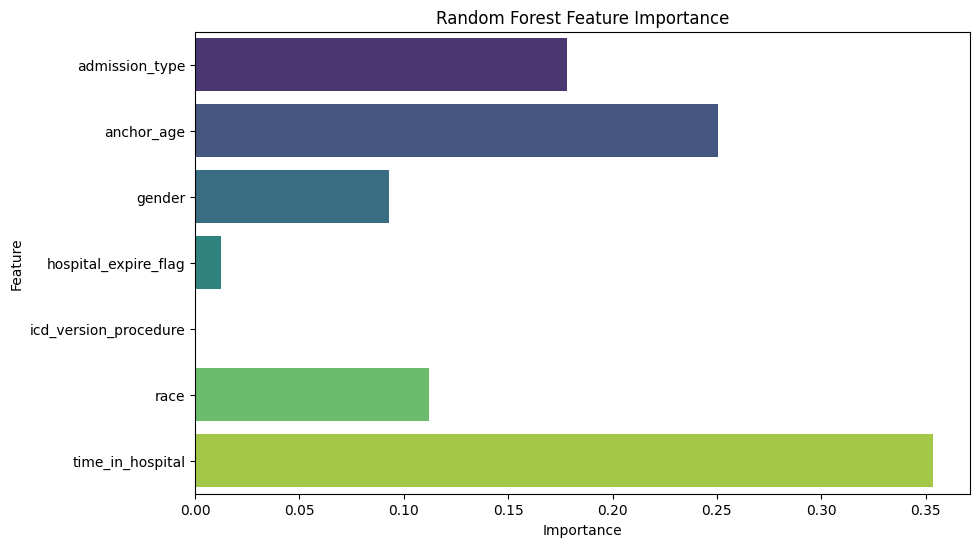

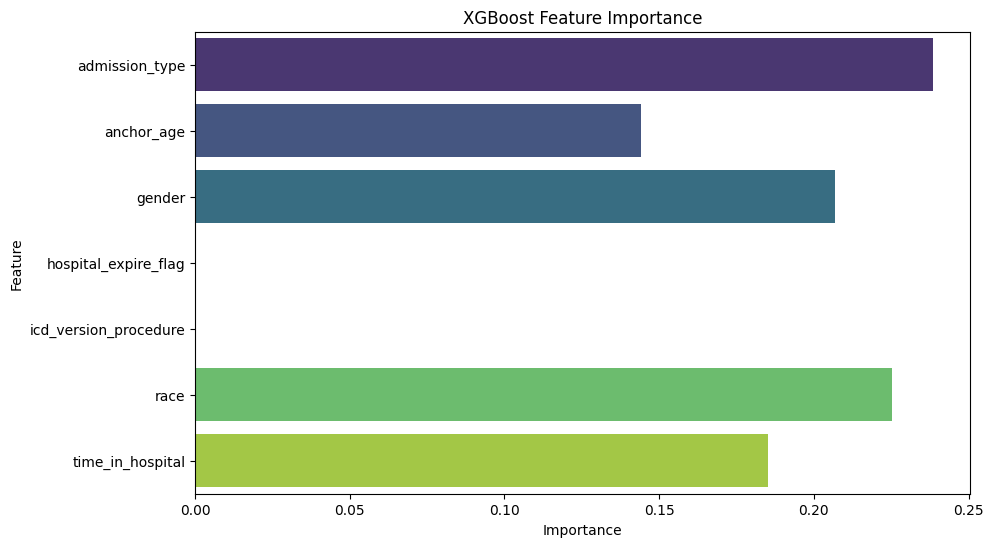

In [ ]:
# Sort feature importances alphabetically
rf_feature_importances = rf_feature_importances.sort_values(by='Feature')
xgb_feature_importances = xgb_feature_importances.sort_values(by='Feature')

# Define a color palette
color_palette = sns.color_palette("viridis", n_colors=len(rf_feature_importances))

# Visualize feature importances for Random Forest model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances, palette=color_palette)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize feature importances for XGBoost model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importances, palette=color_palette)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define your feature columns and target variable
feature_columns = ['anchor_age', 'gender', 'race', 'time_in_hospital', 'hospital_expire_flag', 'icd_version_procedure']
target_variable = 'Heart_Disease'

# Split the data into features and target
X = final_dataset[feature_columns]
y = final_dataset[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3)
rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)

# Hyperparameter tuning for XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3)
xgb_grid.fit(X_train, y_train)
print("XGBoost Best Parameters:", xgb_grid.best_params_)


Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
XGBoost Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
from sklearn.metrics import classification_report

# Train Random Forest with best parameters
rf_best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42)
rf_best_model.fit(X_train, y_train)

# Train XGBoost with best parameters
xgb_best_model = XGBClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0, random_state=42)
xgb_best_model.fit(X_train, y_train)

# Predictions for Random Forest and XGBoost models
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_best_model.predict(X_test)

# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.00      0.00      0.00         4

    accuracy                           0.89        35
   macro avg       0.44      0.50      0.47        35
weighted avg       0.78      0.89      0.83        35

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.00      0.00      0.00         4

    accuracy                           0.89        35
   macro avg       0.44      0.50      0.47        35
weighted avg       0.78      0.89      0.83        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Random Forest Confusion Matrix:
[[31  0]
 [ 4  0]]
XGBoost Confusion Matrix:
[[31  0]
 [ 4  0]]


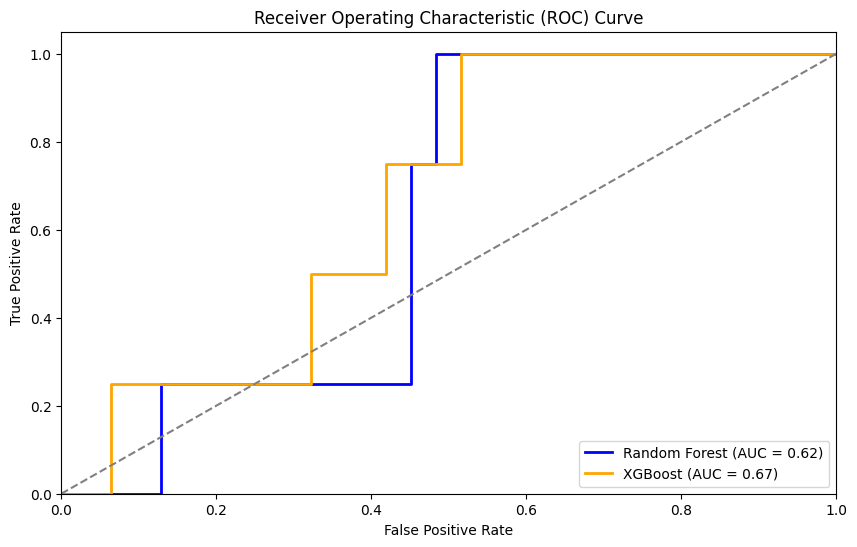

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("XGBoost Confusion Matrix:")
print(xgb_cm)

# ROC Curve for Random Forest
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# ROC Curve for XGBoost
xgb_probs = xgb_best_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='orange', lw=2, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# DEEP LEARNING APPROACH

# LR on Plateau

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Additional layer
model.add(Dropout(0.5))  # Additional dropout
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate reduction callback
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=6, verbose=1, min_lr=1e-7)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[lr_reducer])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Predict risk assessment scores
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_class = np.round(y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Print Classification Report
class_report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(class_report)

Epoch 1/100
4/4 [==============================] - 1s 72ms/step - loss: 0.6712 - accuracy: 0.5536 - val_loss: 0.6508 - val_accuracy: 0.8214 - lr: 0.0100
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6913 - accuracy: 0.5446 - val_loss: 0.6428 - val_accuracy: 0.8214 - lr: 0.0100
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6437 - accuracy: 0.6339 - val_loss: 0.6358 - val_accuracy: 0.8571 - lr: 0.0100
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6825 - accuracy: 0.5804 - val_loss: 0.6270 - val_accuracy: 0.8929 - lr: 0.0100
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6361 - accuracy: 0.6696 - val_loss: 0.6199 - val_accuracy: 0.8929 - lr: 0.0100
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6260 - accuracy: 0.7054 - val_loss: 0.6114 - val_accuracy: 0.8929 - lr: 0.0100
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6401 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


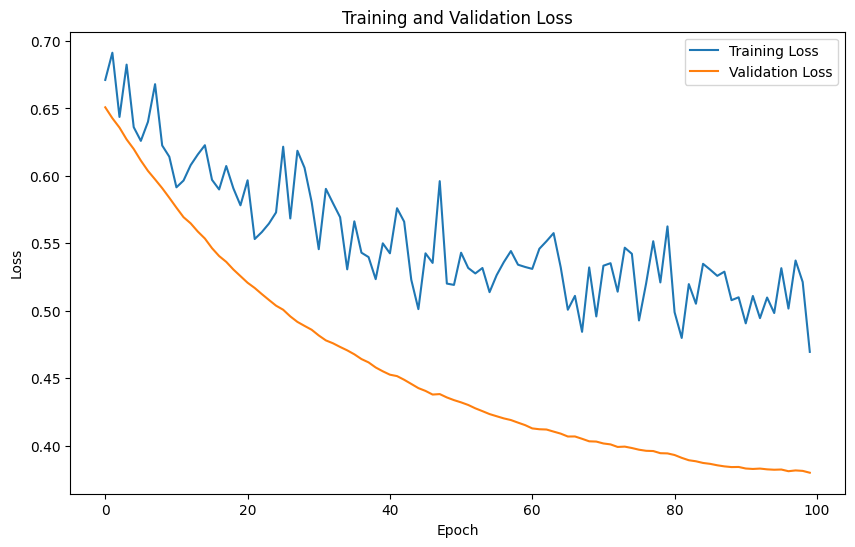

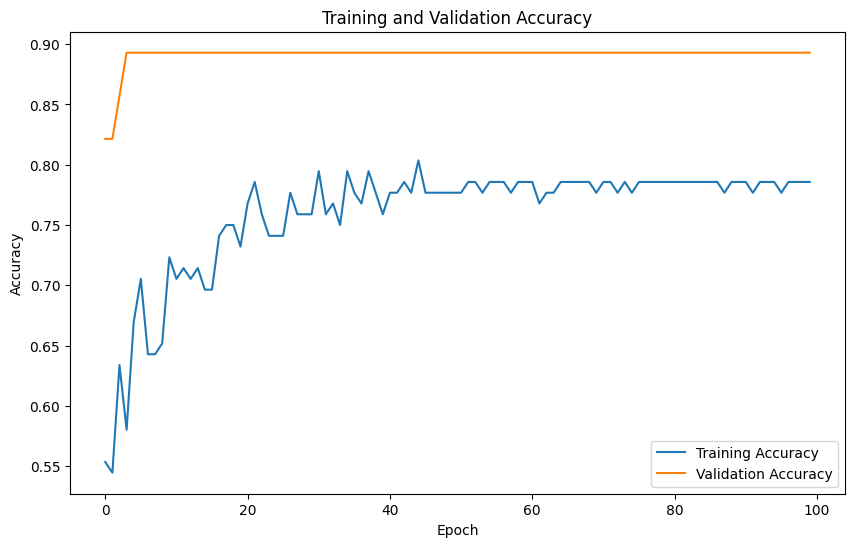

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#SMOTE + LRR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from keras.callbacks import ReduceLROnPlateau


# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Additional layer
model.add(Dropout(0.5))  # Additional dropout
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate reduction callback
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7)

# Train the model

# Compile and train the model using X_train_smote and y_train_smote
history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Predict risk assessment scores
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_class = np.round(y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Print Classification Report
class_report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(class_report)

Epoch 1/100
6/6 [==============================] - 1s 66ms/step - loss: 0.6661 - accuracy: 0.6111 - val_loss: 0.7430 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6739 - accuracy: 0.5889 - val_loss: 0.7660 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6734 - accuracy: 0.5556 - val_loss: 0.7832 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6508 - accuracy: 0.6167 - val_loss: 0.8028 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.6111 - val_loss: 0.8153 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6314 - accuracy: 0.6333 - val_loss: 0.8255 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6369 - accuracy: 0.6167 - val_loss: 0.8350 - val_accuracy: 0.000

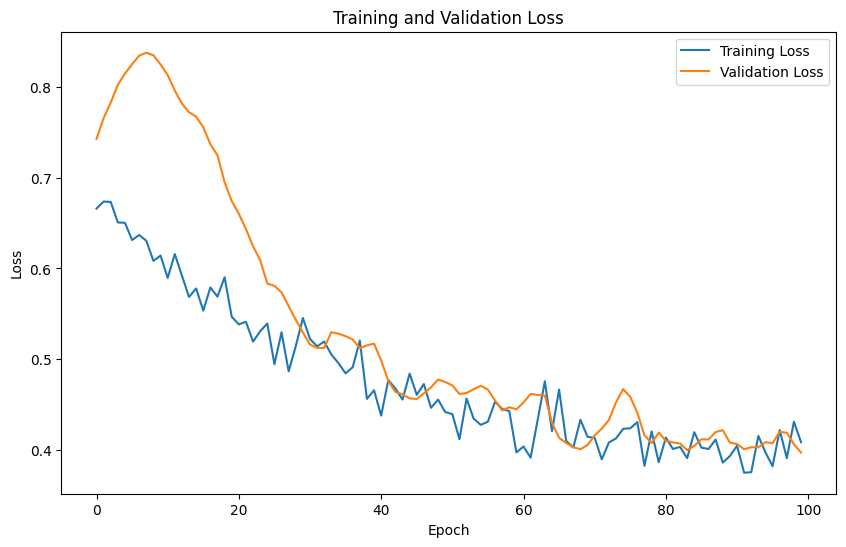

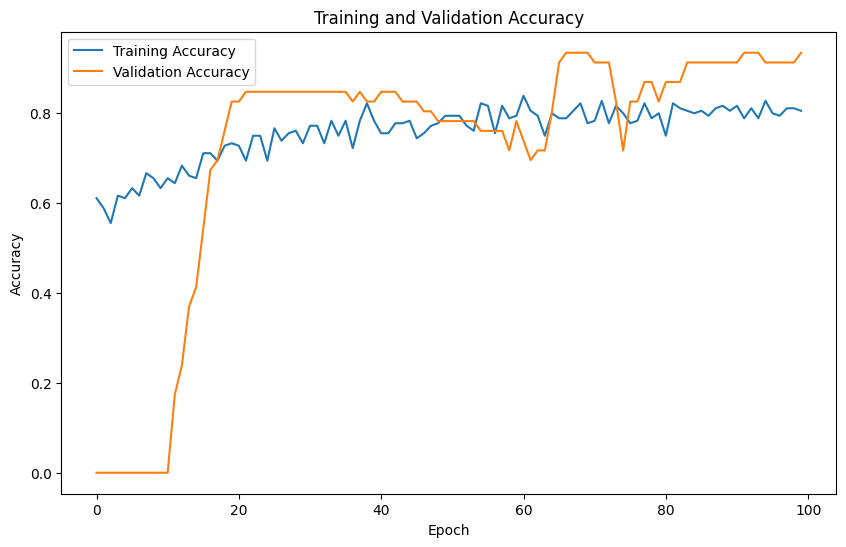

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Batch Normalization

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle
from keras.layers import Dense, Dropout, BatchNormalization


# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# Upsample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train_scaled, y_train)

# Shuffle the upsampled data
X_train_upsampled, y_train_upsampled = shuffle(X_train_upsampled, y_train_upsampled, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())  # Add batch normalization layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Predict risk assessment scores
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_class = np.round(y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Print Classification Report
class_report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(class_report)

Epoch 1/100
4/4 [==============================] - 2s 83ms/step - loss: 1.3400 - accuracy: 0.4554 - val_loss: 0.6822 - val_accuracy: 0.6786
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1568 - accuracy: 0.5089 - val_loss: 0.6753 - val_accuracy: 0.6071
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9746 - accuracy: 0.5089 - val_loss: 0.6674 - val_accuracy: 0.6071
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.2290 - accuracy: 0.4732 - val_loss: 0.6603 - val_accuracy: 0.6786
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9798 - accuracy: 0.5804 - val_loss: 0.6493 - val_accuracy: 0.7143
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8352 - accuracy: 0.6250 - val_loss: 0.6376 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9368 - accuracy: 0.5446 - val_loss: 0.6289 - val_accuracy: 0.7500
Epoch 8/100
4/4 [===

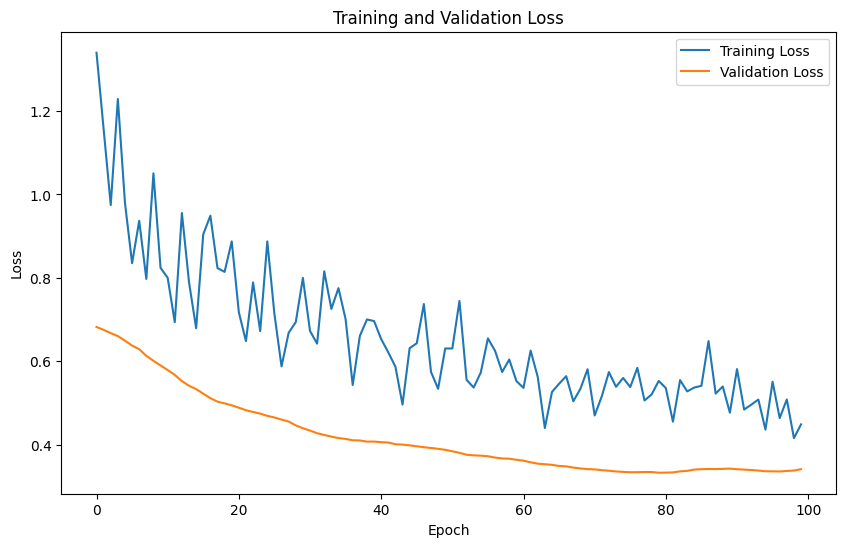

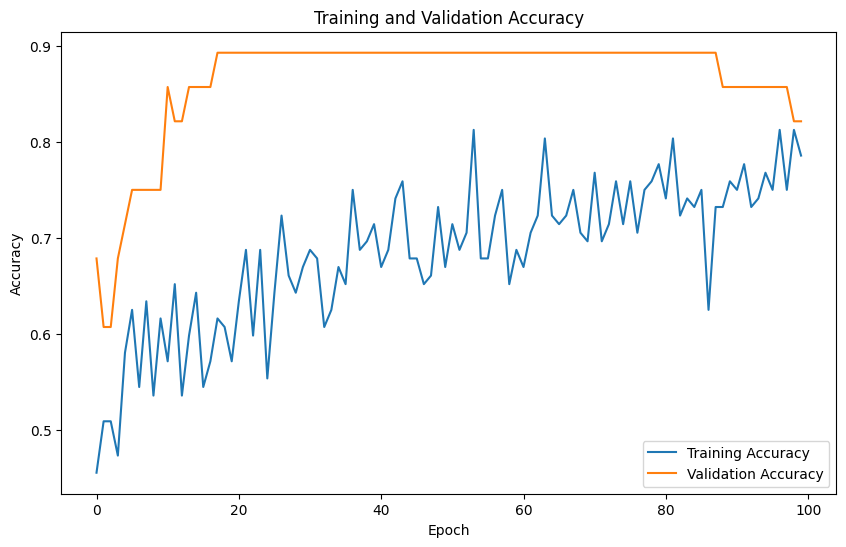

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy$$
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()